<a href="https://colab.research.google.com/github/yrodriguezmd/Surgical_instruments/blob/main/project/Surg100/notebooks/Surg100_oct1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
!bash install_colab.sh

In [ ]:
exit()

In [ ]:
import icevision
print('icevision v',icevision.__version__)
print('torch v',torch.__version__)
print('torchvision v',torchvision.__version__)

icevision v 0.10.0a1
torch v 1.9.0+cu102
torchvision v 0.10.0+cu102


In [ ]:
from icevision.all import *

In [ ]:
#option 1: git clone
!git clone https://github.com/yrodriguezmd/Surgical_instruments.git
# initially run with no File9, later added

#option 2:
#colab upload

Cloning into 'Surgical_instruments'...
remote: Enumerating objects: 190, done.
remote: Counting objects: 100% (190/190), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 190 (delta 15), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (190/190), 10.40 MiB | 13.80 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [ ]:
!ls

annot.json   install_colab.sh	 pilot15_for_pseudolabel  Surgical_instruments
checkpoints  install_colab.sh.1  sample_data


In [ ]:
!ls Surgical_instruments/project/Surg100/raw_images
# 'a' removed

a	       File00021.jpg  File00042.jpg  File00063.jpg  File00084.jpg
File00001.jpg  File00022.jpg  File00043.jpg  File00064.jpg  File00085.jpg
File00002.jpg  File00023.jpg  File00044.jpg  File00065.jpg  File00086.jpg
File00003.jpg  File00024.jpg  File00045.jpg  File00066.jpg  File00087.jpg
File00004.jpg  File00025.jpg  File00046.png  File00067.jpg  File00088.jpg
File00005.jpg  File00026.jpg  File00047.jpg  File00068.jpg  File00089.jpg
File00006.jpg  File00027.jpg  File00048.jpg  File00069.jpg  File00090.jpg
File00007.jpg  File00028.jpg  File00049.jpg  File00070.jpg  File00091.jpg
File00008.jpg  File00029.jpg  File00050.jpg  File00071.jpg  File00092.jpg
File00009.jpg  File00030.jpg  File00051.jpg  File00072.jpg  File00093.jpg
File00010.jpg  File00031.jpg  File00052.jpg  File00073.jpg  File00094.jpg
File00011.jpg  File00032.jpg  File00053.jpg  File00074.JPG  File00095.jpg
File00012.jpg  File00033.jpg  File00054.jpg  File00075.jpg  File00096.jpg
File00013.jpg  File00034.jpg  File00055.jpg 

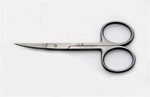

In [ ]:
image_path = Path('Surgical_instruments/project/Surg100/raw_images/')
## images better in a folder
img_files = get_image_files(image_path)

img = PIL.Image.open(img_files[0])
img = img.convert('RGB')

img.to_thumb(150,150)

In [ ]:
# using model pretrained on coco
CLASSES = ('person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
               'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
               'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
               'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
               'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
               'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
               'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
               'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
               'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot',
               'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
               'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop',
               'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
               'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
               'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush')
class_map = ClassMap(CLASSES)
len(class_map)
# 80 + background

81

In [ ]:
print(class_map.get_by_name('knife'))
print(class_map.get_by_name('scissors'))

44
77


In [ ]:
from icevision.models.checkpoint import *

In [ ]:
model_type = models.mmdet.vfnet
backbone = model_type.backbones.resnet50_fpn_mstrain_2x

In [ ]:
model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(class_map),)# **extra_args) 

In [ ]:
backbone.__dict__

# filename diff on website, file down/uploaded
#retinanet_r50_caffe_fpn_1x_coco_20200531-f11027c5.pth

{'config_path': Path('/root/.icevision/mmdetection_configs/mmdetection_configs-2.16.0/configs/vfnet/vfnet_r50_fpn_mstrain_2x_coco.py'),
 'model_name': 'vfnet',
 'pretrained': True,
 'weights_url': 'https://openmmlab.oss-cn-hangzhou.aliyuncs.com/mmdetection/v2.0/vfnet/vfnet_r50_fpn_mstrain_2x_coco/vfnet_r50_fpn_mstrain_2x_coco_20201027-7cc75bd2.pth'}

In [ ]:
model.eval()

imgs_array = [PIL.Image.open(file) for file in img_files]

imgs_array = [image.convert('RGB') for image in imgs_array]

img_size = 384 

valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(img_size), tfms.A.Normalize()])

infer_ds = Dataset.from_images(imgs_array, valid_tfms, class_map = class_map)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:974: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
len(imgs_array)

100

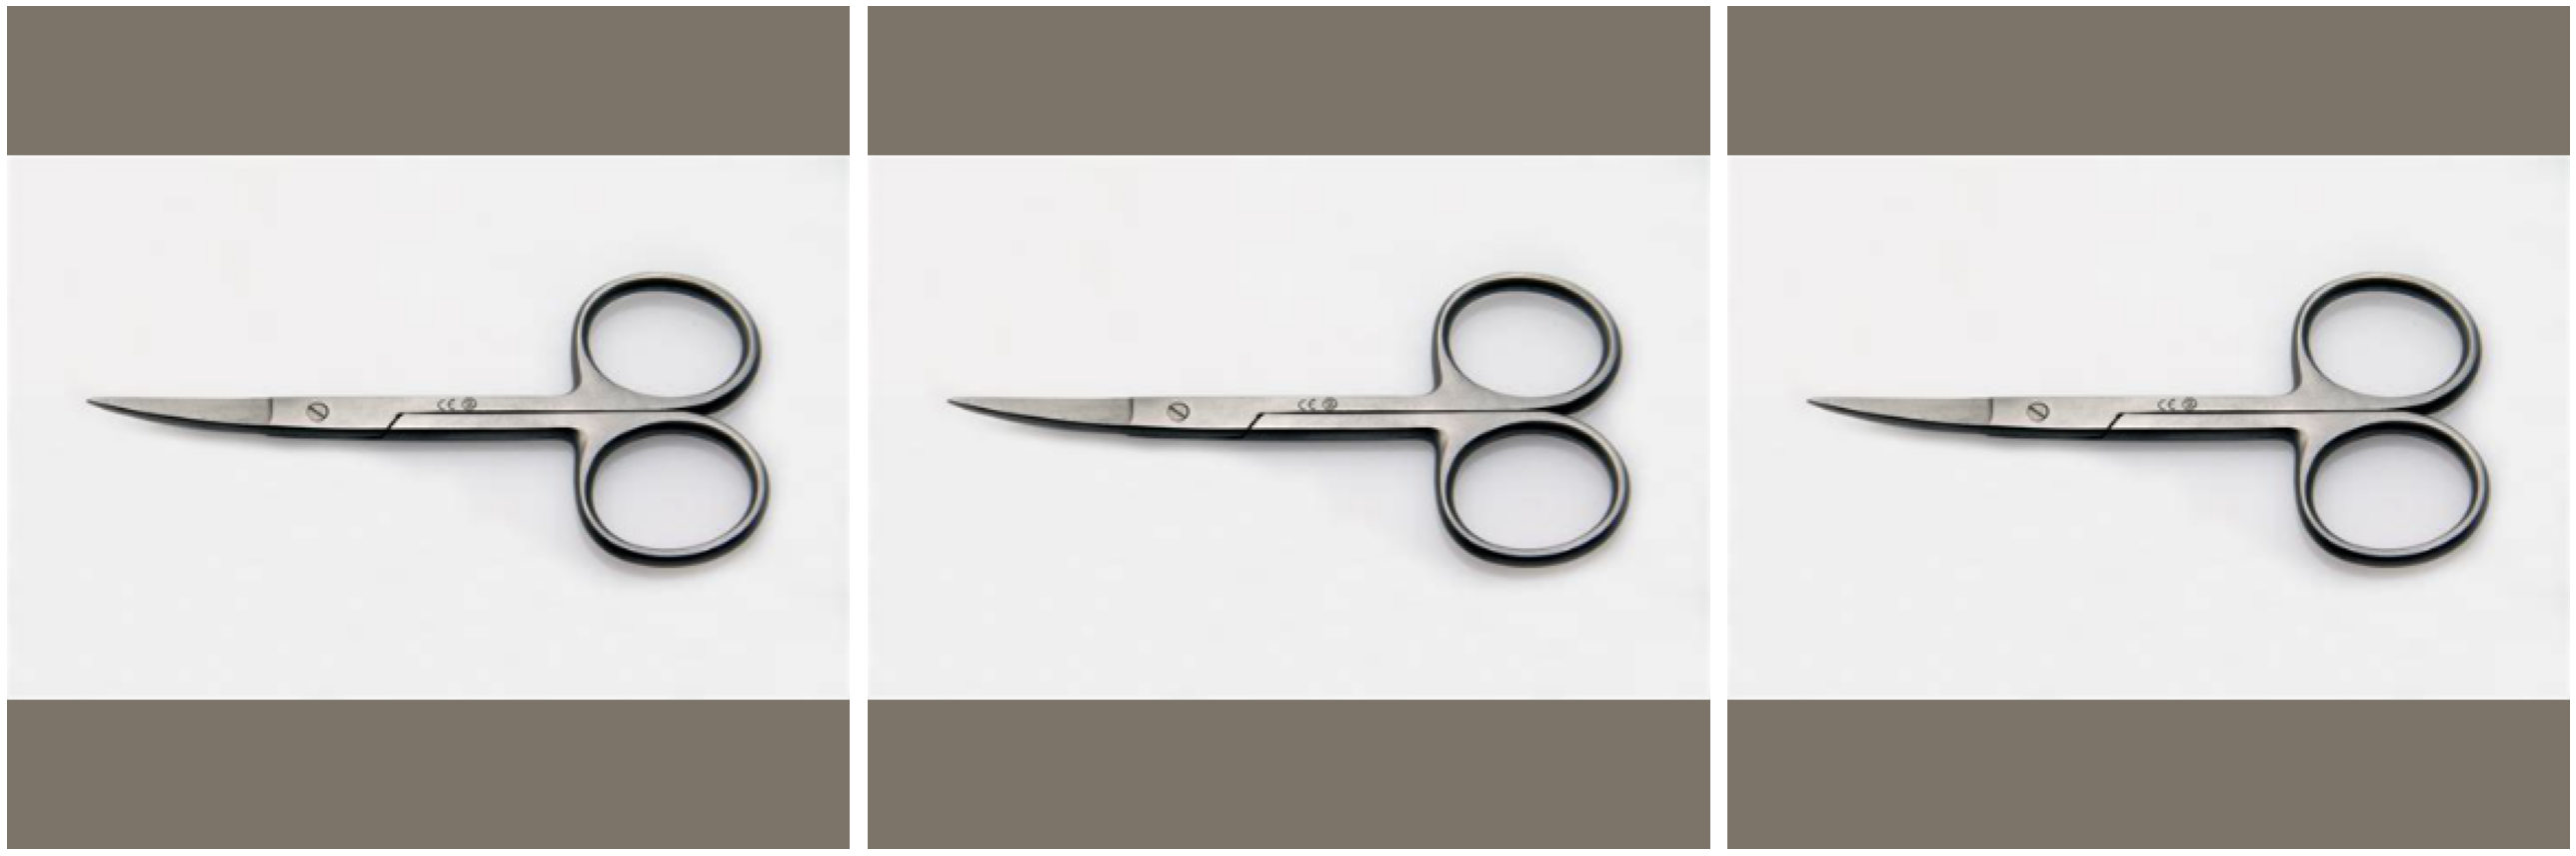

In [ ]:
samples = [infer_ds[0] for _ in range(3)]
show_samples(samples, denormalize_fn = denormalize_imagenet, ncols=3)

In [ ]:
infer_dl = model_type.infer_dl(infer_ds, batch_size=4, shuffle=False)

preds_saved = model_type.predict_from_dl(model, infer_dl,
                                          keep_images=True,) # detection_threshold =0.5 default

  0%|          | 0/25 [00:00<?, ?it/s]

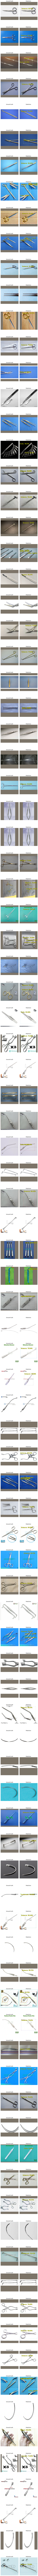

In [ ]:
show_preds(preds_saved, font_size=30, label_color='#ffff00')
#https://github.com/airctic/icevision/blob/9abbb09f47e6fc18867a5aa662885b558af2975c/icevision/models/mmdet/common/bbox/prediction.py

In [ ]:
# other classes apart from scissors and knife:
# laptop (64), toothbrush (80), clock (75), person (1), spoon (45), fork (43)

In [ ]:
preds_saved[0].pred

BaseRecord

common: 
	- Image size ImgSize(width=384, height=384)
	- Img: 384x384x3 <np.ndarray> Image
	- Record ID: 0
detection: 
	- BBoxes: [<BBox (xmin:37.63182067871094, ymin:121.11810302734375, xmax:345.36553955078125, ymax:255.51083374023438)>]
	- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27, 'tie': 28, 'suitcase': 29, 'frisbee': 30, 'skis': 31, 'snowboard': 32, 'sports ball': 33, 'kite': 34, 'baseball bat': 35, 'baseball glove': 36, 'skateboard': 37, 'surfboard': 38, 'tennis racket': 39, 'bottle': 40, 'wine glass': 41, 'cup': 42, 'fork': 43, 'knife': 44, 'spoon': 45, 'bowl': 46, 'banana': 47, 'apple': 48, 'sandw

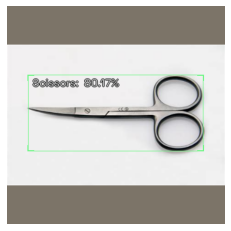

In [ ]:
show_sample(preds_saved[0])

In [ ]:
# adjusting base record to incorporate filepath
#https://github.com/airctic/icevision/blob/e60c2e2117c012ca5c323088f8577935a87c4f4e/icevision/core/record_components.py
for pred in preds_saved:
  pred.add_component(FilepathRecordComponent())

In [ ]:
# adding the filepath for each file after adjusting baserecord
for _ in range(len(preds_saved)): 
  preds_saved[_].set_filepath(img_files[_]) 

In [ ]:
for _ in range(len(preds_saved)):
  print(preds_saved[_].pred)

In [ ]:
conv = convert_preds_to_coco_style(preds_saved) ##
conv
## bboxes in xmin(x top left), ymin (y top left), w, h
# same as convert_records_to_coco_style(preds_saved)
# https://github.com/airctic/icevision/blob/master/icevision/data/convert_records_to_coco_style.py#L78
# https://github.com/pytorch/vision/blob/master/references/detection/coco_utils.py

In [ ]:
conv['annotations'][0] # based on preds_saved

{'area': 41357.17,
 'bbox': [37.63182, 121.1181, 307.7337, 134.39273],
 'category_id': 77,
 'id': 1,
 'image_id': 0,
 'iscrowd': 0,
 'score': 0.8016772}

In [ ]:
add_info = {
    "info": {
    "description": "Surgery Instruments",
    "url": "http://cocodataset.org",
    "version": "1.0",
    "year": 2021,
    "contributor": "MR",
    "date_created": "2021/09/27"
    },
  "categories": [
                 ## adjusted to 80 classes, 
                 ## limiting categories to relevant classes
                 # not including 'person' and 'clock'
    {
      "supercategory": "kitchen",
      "id": 43,
      "name": "fork"
    },
    {
      "supercategory": "kitchen",
      "id": 44,
      "name": "knife"
    },
    {
      "supercategory": "kitchen",
      "id": 45,
      "name": "spoon"
    },
    {
      "supercategory": "electronic",
      "id": 64,
      "name": "laptop"
    },
    {
      "supercategory": "indoor",
      "id": 77,
      "name": "scissors"
    },
    {
      "supercategory": "indoor",
      "id": 80,
      "name": "toothbrush"
    }
    ] }

In [ ]:
annot = {**add_info, **conv}
annot

{'annotations': [{'area': 41357.17,
   'bbox': [37.63182, 121.1181, 307.7337, 134.39273],
   'category_id': 77,
   'id': 1,
   'image_id': 0,
   'iscrowd': 0,
   'score': 0.8016772},
  {'area': 38788.977,
   'bbox': [25.907959, 143.16191, 289.8979, 133.8022],
   'category_id': 77,
   'id': 2,
   'image_id': 1,
   'iscrowd': 0,
   'score': 0.81561226},
  {'area': 32111.705,
   'bbox': [96.58162, 81.60109, 283.79285, 113.15192],
   'category_id': 44,
   'id': 3,
   'image_id': 2,
   'iscrowd': 0,
   'score': 0.65933526},
  {'area': 26746.324,
   'bbox': [0.56781006, 162.94217, 273.1521, 97.91733],
   'category_id': 44,
   'id': 4,
   'image_id': 2,
   'iscrowd': 0,
   'score': 0.6574549},
  {'area': 77230.17,
   'bbox': [40.78244, 82.07413, 330.45016, 233.712],
   'category_id': 77,
   'id': 5,
   'image_id': 3,
   'iscrowd': 0,
   'score': 0.867951},
  {'area': 56801.8,
   'bbox': [23.155457, 107.65831, 338.18253, 167.96196],
   'category_id': 77,
   'id': 6,
   'image_id': 4,
   'iscro

In [ ]:
## saving dictionary as json file

f = open('Surg100_annot.json','w') 
f.write(str(annot)) 
f.close()

In [ ]:
# open json in VS code or text editor, replace ' with "
# upload in roboflow

In [ ]:
# roboflow annotated
# no transforms, no resizing on roboflow
# export annotated file (in coco json form) and images

In [ ]:
#!ls

In [ ]:
# after annotating in roboflow
# use images downloaded with the annotations
#parser = parsers.COCOBBoxParser(
#    annotations_filepath = Path('/content/pilot15_roboflow/_annotations.coco.json'), ##
#    img_dir = Path('/content/pilot15_roboflow/', ##
#    mask =False)
#)

In [ ]:
#data_splitter = RandomSplitter([1.0,0])  # default 0.8,0.2
#train_records, valid_records = parser.parse(data_splitter)# default autofix=True

In [ ]:
#show_records(train_records[:3],ncols=3, font_size=30, label_color = '#ffff00')

In [ ]:
#show_records(train_records[3:],ncols=3, font_size=30, label_color = '#ffff00')


In [ ]:
## option to decrease detection threshold, to have more baseline annotations, but mostly
#  incorrect